#**MACHINE LEARNING MTECH PROJECT: HEALTH INSURANCE COST PREDICTION **

> Members:
1. Aishwarya V - CB.EN.P2CSE2201
2. Mahakaleshwar P - CB.EN.P2CSE22007 
3. Venkatraman Ranganath - CB.EN.P2AIE22011

**ABOUT THE PROJECT:**

Health insurance is a necessity for every individual.The insurance offered varies from company to company because the importance given to few features are different from one another.


The aim of this project is to create an understanding of the prediction of the amount required for an individual based on their health.



**DATASET INFORMATION:**

Dimensions of Dataset: 1338 rows , 7 features

Features:
1.   age - Age of the person
2.   sex - Sex of the person
3.   bmi - Body mass Index of the person
4.   children - Number of children for the  person
5.   smoker - Does the person smoke?
6.   region - The region, the person is based of
7.   Charges - Medical Insurance per year for the person

#IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_data, inplace=True)
df_copy
df_clean = df_copy.copy()

##**PREPROCESSING USING STANDARD SCALER**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
tempBmi = df_copy.bmi
tempBmi = tempBmi.values.reshape(-1,1)
df_copy['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = df.age
tempAge = tempAge.values.reshape(-1,1)
df_copy['age'] = StandardScaler().fit_transform(tempAge)

df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,16884.92400
1,-1.509965,0,0.509621,1,0,2,1725.55230
2,-0.797954,0,0.383307,3,0,2,4449.46200
3,-0.441948,0,-1.305531,0,0,0,21984.47061
4,-0.513149,0,-0.292556,0,0,0,3866.85520


In [ ]:
df_clustering = df_copy.copy()

In [ ]:
df_clustering.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,16884.92400
1,-1.509965,0,0.509621,1,0,2,1725.55230
2,-0.797954,0,0.383307,3,0,2,4449.46200
3,-0.441948,0,-1.305531,0,0,0,21984.47061
4,-0.513149,0,-0.292556,0,0,0,3866.85520


##**CONVERTING REGRESSION TO CLASSIFICATION**

In [ ]:
category = ['Basic','Average','Affordable','Moderately Expensive','Expensive']

df_copy['charges'] = pd.cut(x=df_copy['charges'],bins=[0,15000,30000, 45000,60000,100000],labels=category)

In [ ]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,Average
1,-1.509965,0,0.509621,1,0,2,Basic
2,-0.797954,0,0.383307,3,0,2,Basic
3,-0.441948,0,-1.305531,0,0,0,Average
4,-0.513149,0,-0.292556,0,0,0,Basic


In [ ]:
df_copy['charges'].value_counts().sort_values()

Expensive                 3
Moderately Expensive     35
Affordable              124
Average                 196
Basic                   980
Name: charges, dtype: int64

#TRAIN TEST SPLIT

In [ ]:
X = df_copy.drop('charges',axis=1).values
y = df_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/__init__.py:202: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]


#1. DECISION TREE CLASSIFIER

In [ ]:
df_copy

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,Average
1,-1.509965,0,0.509621,1,0,2,Basic
2,-0.797954,0,0.383307,3,0,2,Basic
3,-0.441948,0,-1.305531,0,0,0,Average
4,-0.513149,0,-0.292556,0,0,0,Basic
...,...,...,...,...,...,...,...
1333,0.768473,0,0.050297,3,0,0,Basic
1334,-1.509965,1,0.206139,0,0,1,Basic
1335,-1.509965,1,1.014878,0,0,2,Basic
1336,-1.296362,1,-0.797813,0,0,3,Basic


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [ ]:
decisiontree_clf = DecisionTreeClassifier(random_state=1234 , max_depth=3)
model = decisiontree_clf.fit(X_train, y_train)

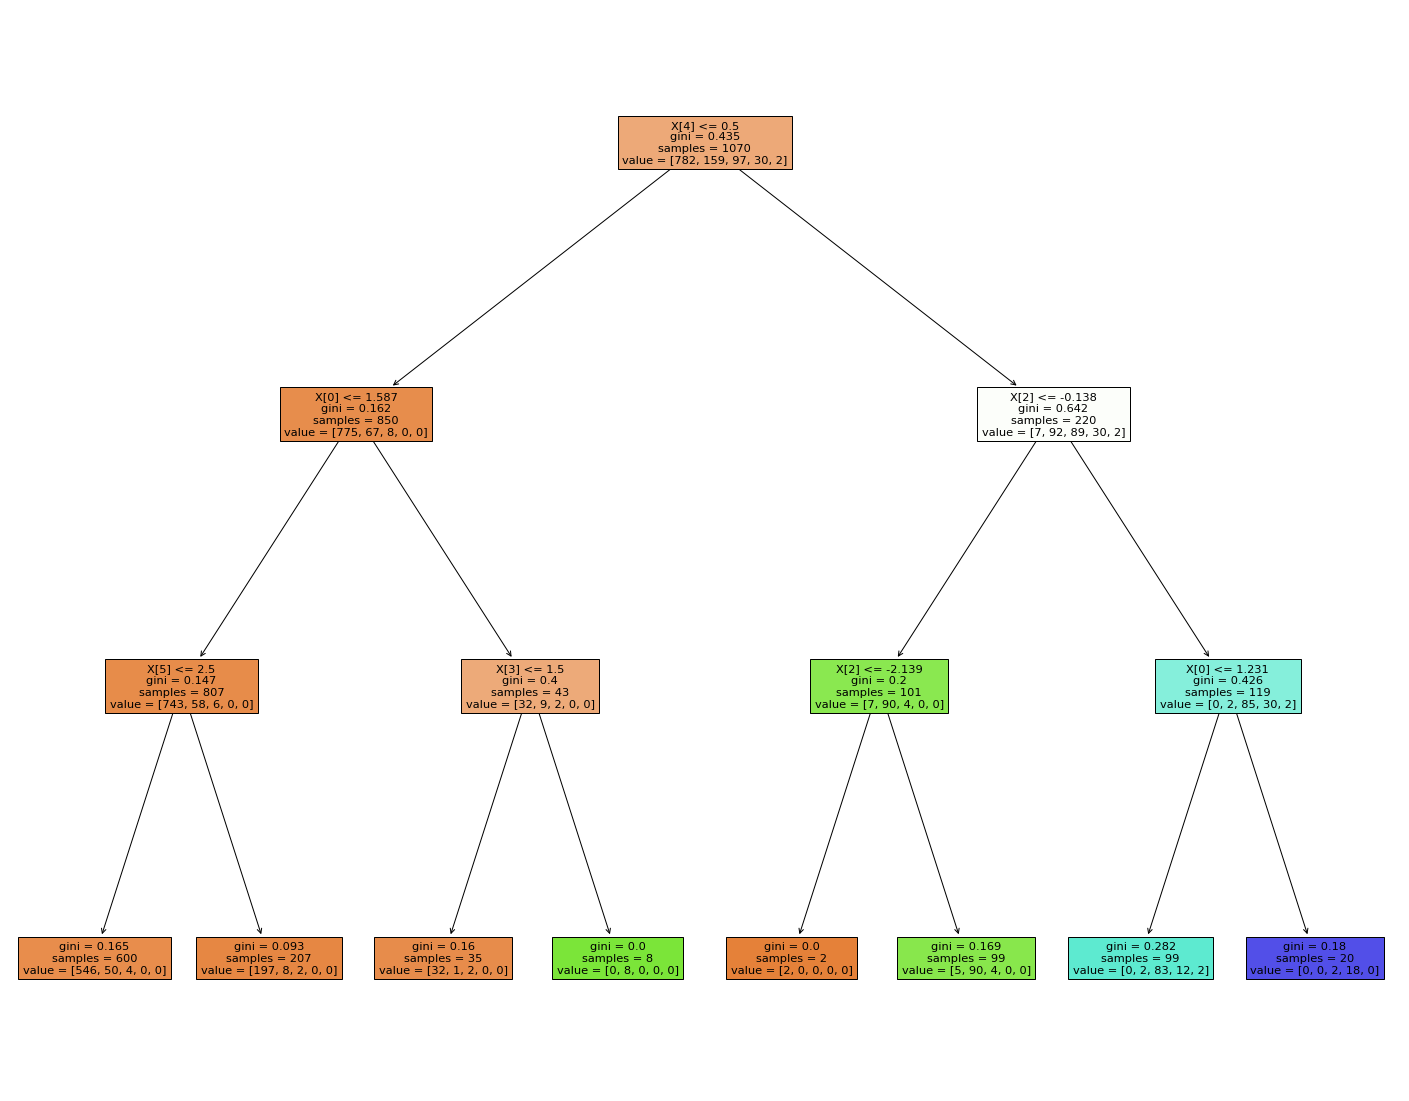

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisiontree_clf,filled=True)

In [ ]:
predictions = decisiontree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       198
           1       0.88      0.62      0.73        37
           2       0.85      0.81      0.83        27
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         1

    accuracy                           0.91       268
   macro avg       0.68      0.61      0.64       268
weighted avg       0.91      0.91      0.91       268



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**INFERENCE: DECISION TREE HAS AN ACCURACY OF 91 PERCENT**

##**CONFUSION MATRIX**

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Basic','Average','Affordable','Moderately Expensive','Expensive'])

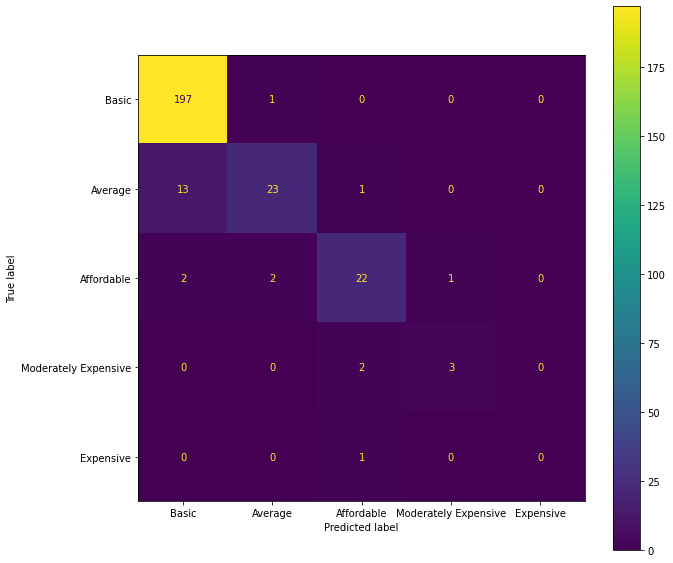

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax)
plt.show()

#2. SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC(kernel = 'rbf', random_state = 0)
svm_clf.fit(X_train, y_train.ravel())

SVC(random_state=0)

In [ ]:
predictions = svm_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       198
           1       0.81      0.57      0.67        37
           2       0.90      0.67      0.77        27
           3       0.71      1.00      0.83         5
           4       0.00      0.00      0.00         1

    accuracy                           0.90       268
   macro avg       0.67      0.65      0.64       268
weighted avg       0.90      0.90      0.89       268



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**INFERENCE: SVM HAS AN ACCURACY OF 90 PERCENT**

##**CONFUSION MATRIX**

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)


In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Basic','Average','Affordable','Moderately Expensive','Expensive'])

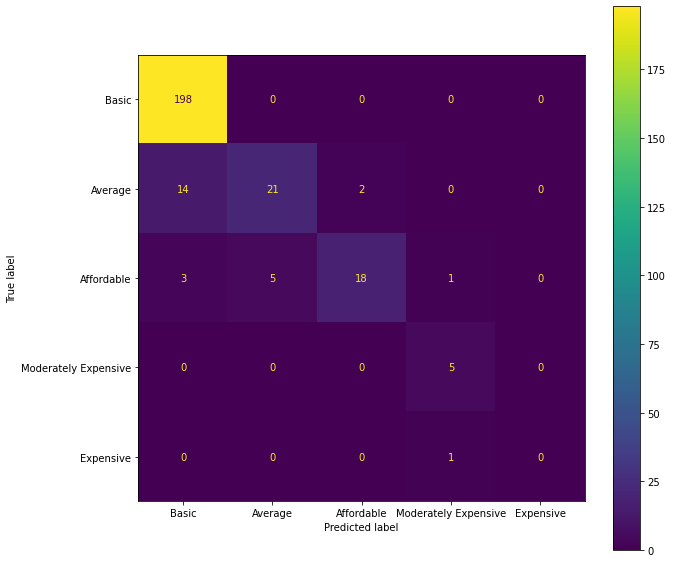

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax)
plt.show()

#3. NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
predictions = gaussian_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       198
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        27
           3       0.13      1.00      0.23         5
           4       0.00      0.00      0.00         1

    accuracy                           0.76       268
   macro avg       0.21      0.40      0.24       268
weighted avg       0.69      0.76      0.71       268



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**INFERENCE: NAIVE BAYES HAS AN ACCURACY OF 76 PERCENT**

##**CONFUSION MATRIX**

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Basic','Average','Affordable','Moderately Expensive','Expensive'])

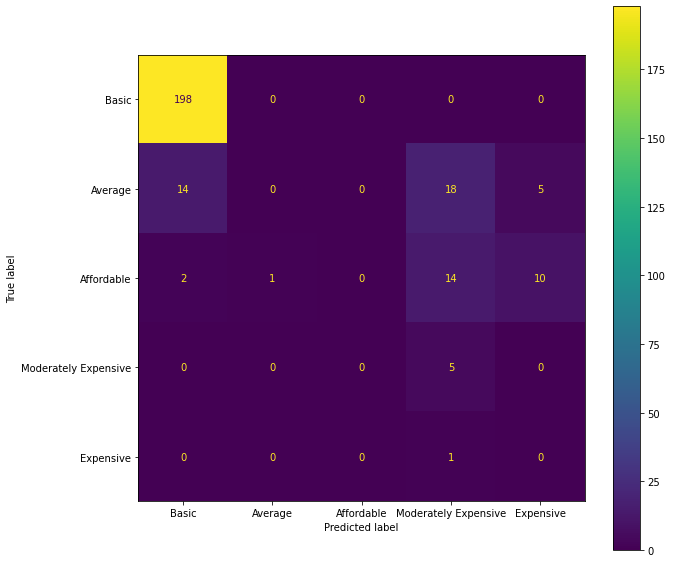

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax)
plt.show()

#4. PERCEPTRON

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
print(df_copy.shape)

(1338, 7)


In [ ]:
df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,-1.805565e-16,1.000374,-1.509965,-0.869155,-0.014740,0.839674,1.765289
sex,1338.0,4.947683e-01,0.500160,0.000000,0.000000,0.000000,1.000000,1.000000
bmi,1338.0,-2.124194e-16,1.000374,-2.412011,-0.716406,-0.043209,0.661157,3.685522
children,1338.0,1.094918e+00,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
smoker,1338.0,2.047833e-01,0.403694,0.000000,0.000000,0.000000,0.000000,1.000000
region,1338.0,1.514948e+00,1.105572,0.000000,1.000000,2.000000,2.000000,3.000000


In [ ]:
target_column = ['charges']

predictors = list(set(list(df_copy.columns))-set(target_column))
df_copy[predictors] = df_copy[predictors]/df_copy[predictors].max()
df_copy.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,1338.0,-9.426109e-17,0.566691,-0.855364,-0.492358,-0.008350,0.475658,1.0
sex,1338.0,4.947683e-01,0.500160,0.000000,0.000000,0.000000,1.000000,1.0
bmi,1338.0,-5.576008e-17,0.271433,-0.654456,-0.194384,-0.011724,0.179393,1.0
children,1338.0,2.189836e-01,0.241099,0.000000,0.000000,0.200000,0.400000,1.0
smoker,1338.0,2.047833e-01,0.403694,0.000000,0.000000,0.000000,0.000000,1.0
region,1338.0,5.049826e-01,0.368524,0.000000,0.333333,0.666667,0.666667,1.0


In [ ]:
df_copy

,age,sex,bmi,children,smoker,region,charges
0,-0.815030,1.0,-0.123000,0.0,1.0,1.000000,Average
1,-0.855364,0.0,0.138276,0.2,0.0,0.666667,Basic
2,-0.452024,0.0,0.104003,0.6,0.0,0.666667,Basic
3,-0.250354,0.0,-0.354232,0.0,0.0,0.000000,Average
4,-0.290688,0.0,-0.079380,0.0,0.0,0.000000,Basic
...,...,...,...,...,...,...,...
1333,0.435324,0.0,0.013647,0.6,0.0,0.000000,Basic
1334,-0.855364,1.0,0.055932,0.0,0.0,0.333333,Basic
1335,-0.855364,1.0,0.275369,0.0,0.0,0.666667,Basic
1336,-0.734362,1.0,-0.216472,0.0,0.0,1.000000,Basic


In [ ]:
X = df_copy[predictors].values
y = df_copy[target_column].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [ ]:
## activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
## solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500) # Variations w.r.to parameters can be tried.
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## **CLASSIFICATION REPORT ON TRAINING DATA**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_train,predict_train))

                      precision    recall  f1-score   support

          Affordable       0.87      0.84      0.85        98
             Average       0.89      0.55      0.68       161
               Basic       0.91      0.99      0.95       781
           Expensive       0.00      0.00      0.00         3
Moderately Expensive       0.78      0.78      0.78        27

            accuracy                           0.90      1070
           macro avg       0.69      0.63      0.65      1070
        weighted avg       0.90      0.90      0.89      1070



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**CONFUSION MATRIX**

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_train, predict_train)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Basic','Average','Affordable','Moderately Expensive','Expensive'])

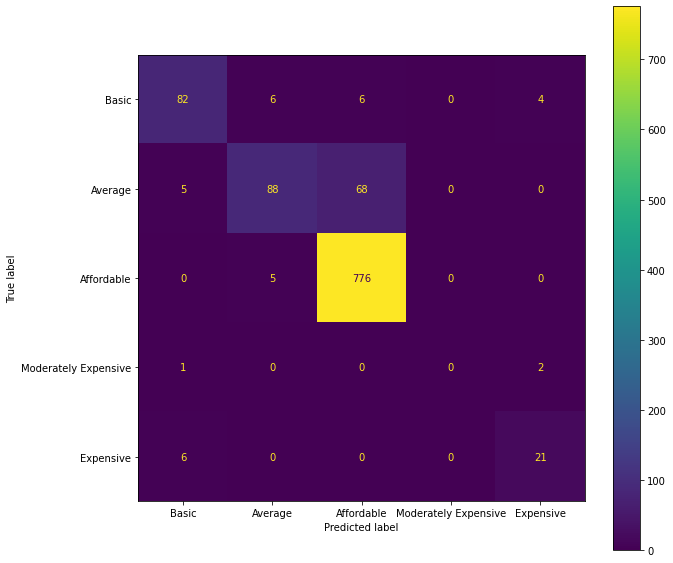

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax)
plt.show()

##**CLASSIFICATION REPORT ON TESTING DATA**

In [ ]:
print(classification_report(y_test,predict_test))

                      precision    recall  f1-score   support

          Affordable       0.80      0.77      0.78        26
             Average       0.88      0.63      0.73        35
               Basic       0.92      0.99      0.95       199
Moderately Expensive       0.75      0.38      0.50         8

            accuracy                           0.90       268
           macro avg       0.84      0.69      0.74       268
        weighted avg       0.90      0.90      0.90       268



##**CONFUSION MATRIX**

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_test)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Basic','Average','Affordable','Moderately Expensive','Expensive'])

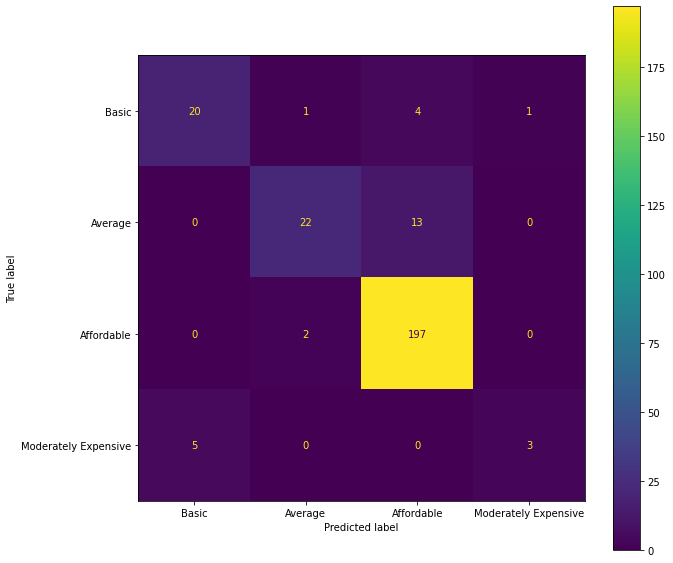

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax)
plt.show()

#5. CLUSTERING ALGORITHMS


##**K-MEANS**

In [ ]:
df_clustering = df_clustering.drop(['charges'],axis=1)

In [ ]:
df_clustering

,age,sex,bmi,children,smoker,region
0,-1.438764,1,-0.453320,0,1,3
1,-1.509965,0,0.509621,1,0,2
2,-0.797954,0,0.383307,3,0,2
3,-0.441948,0,-1.305531,0,0,0
4,-0.513149,0,-0.292556,0,0,0
...,...,...,...,...,...,...
1333,0.768473,0,0.050297,3,0,0
1334,-1.509965,1,0.206139,0,0,1
1335,-1.509965,1,1.014878,0,0,2
1336,-1.296362,1,-0.797813,0,0,3


In [ ]:
x = df_clustering.iloc[:,[0,2]].values

In [ ]:
from sklearn.cluster import KMeans

wcss_list = []

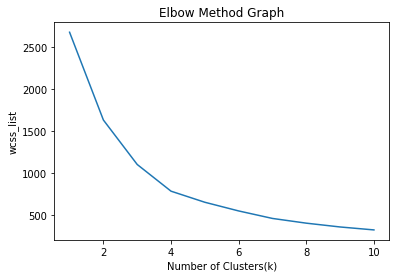

In [ ]:
for i in range(1,11):

  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_list)
plt.title('Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()

###INFERENCE: USING ELBOW METHOD WE FIND NUMBER OF CLUSTERS K = 4

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_pred = kmeans.fit_predict(x)

In [ ]:
y_pred

array([0, 3, 3, ..., 3, 0, 1], dtype=int32)

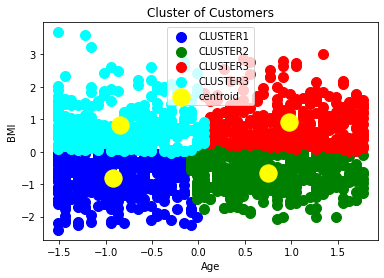

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'CLUSTER1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'CLUSTER2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'CLUSTER3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'CLUSTER3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroid')
plt.title('Cluster of Customers')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

##**AGGLOMERATIVE CLUSTERING**

In [ ]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [ ]:
df_clean = df_clean.drop(['charges'],axis=1)

In [ ]:
from sklearn.preprocessing import normalize

data_scaled = normalize(df_clean)
data_scaled = pd.DataFrame(data_scaled, columns=df_clean.columns)
data_scaled.head()

,age,sex,bmi,children,smoker,region,charges
0,0.001125,0.000059,0.001652,0.000000,0.000059,0.000178,0.999998
1,0.010429,0.000000,0.019566,0.000579,0.000000,0.001159,0.999753
2,0.006293,0.000000,0.007416,0.000674,0.000000,0.000449,0.999952
3,0.001501,0.000000,0.001033,0.000000,0.000000,0.000000,0.999998
4,0.008275,0.000000,0.007468,0.000000,0.000000,0.000000,0.999938


###DENDROGRAM

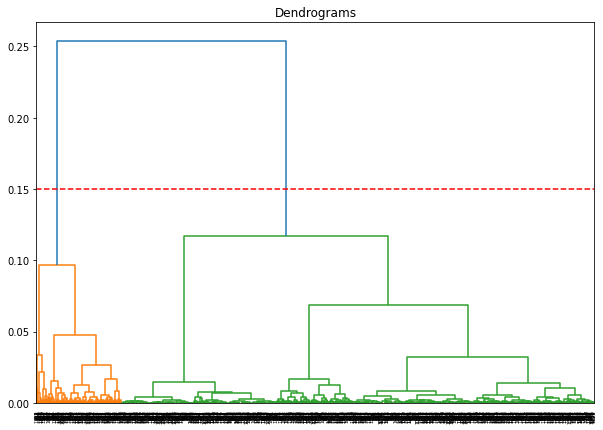

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.15,color='r',linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

###NUMBER OF CLUSTERS = 2

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit_predict(df_clustering)

array([0, 0, 1, ..., 0, 0, 0])

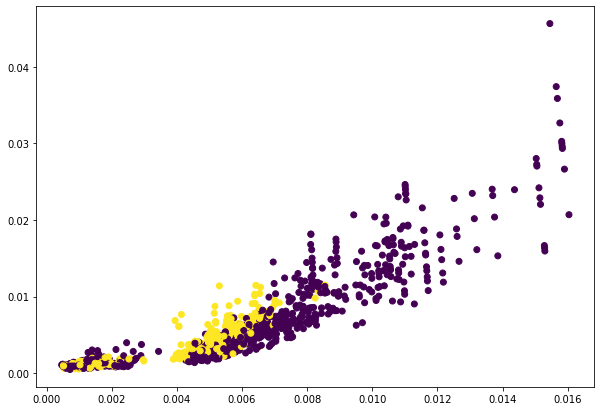

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(data_scaled['age'], data_scaled['bmi'], c=cluster.labels_)
plt.show()

###NUMBER OF CLUSTERS = 3

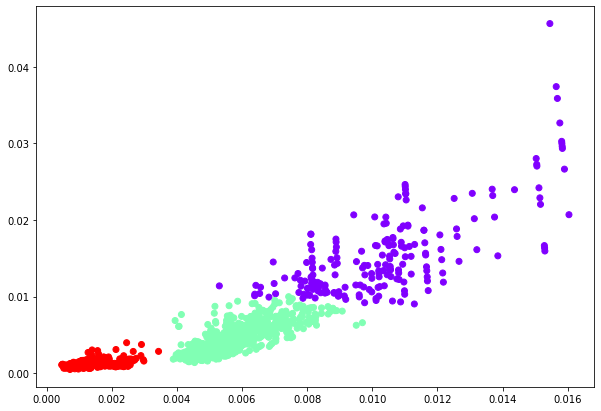

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
plt.figure(figsize = (10,7))
plt.scatter(data_scaled['age'], data_scaled['bmi'], c = ac3.fit_predict(data_scaled), cmap = 'rainbow')
plt.show()

###NUMBER OF CLUSTERS = 4

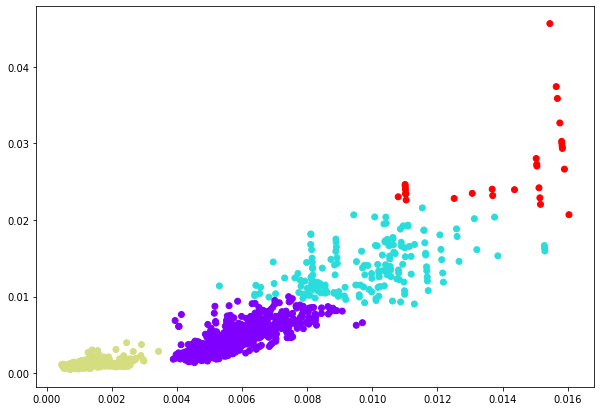

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
plt.figure(figsize = (10,7))
plt.scatter(data_scaled['age'], data_scaled['bmi'], c = ac2.fit_predict(data_scaled), cmap = 'rainbow')
plt.show()

###SILHOUETTE SCORE

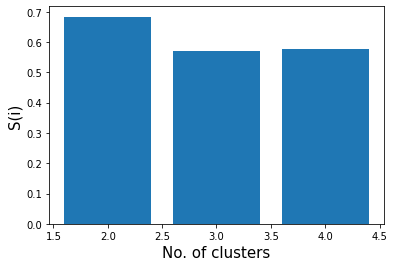

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
silhouette_scores.append(silhouette_score(data_scaled,cluster.fit_predict(data_scaled)))
silhouette_scores.append(silhouette_score(data_scaled,ac3.fit_predict(data_scaled)))
silhouette_scores.append(silhouette_score(data_scaled,ac2.fit_predict(data_scaled)))

plt.bar([2,3,4], silhouette_scores)
plt.xlabel('No. of clusters', fontsize = 15)
plt.ylabel('S(i)', fontsize = 15)
plt.show()